In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv(r"C:\Users\ASUS\project 2 Height weight prediction\SOCR-HeightWeight.csv")

In [6]:
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [7]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [8]:
df['Weight_kg']=df['Weight(Pounds)']*0.453592

In [9]:
df['Weight_kg']

0        51.252494
1        61.909547
2        69.411778
3        64.562199
4        65.452010
           ...    
24995    53.538008
24996    54.518674
24997    53.644285
24998    59.995797
24999    56.641938
Name: Weight_kg, Length: 25000, dtype: float64

In [10]:
df['Height(Feet.Inches)'] = df['Height(Inches)'] // 12 + (df['Height(Inches)'] % 12) /10

In [11]:
df['Height(Feet.Inches)']

0        5.578331
1        6.151521
2        5.939874
3        5.821660
4        5.778781
           ...   
24995    5.950215
24996    5.454826
24997    5.469855
24998    5.752918
24999    5.887761
Name: Height(Feet.Inches), Length: 25000, dtype: float64

In [12]:
df.describe()

,Index,Height(Inches),Weight(Pounds),Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,57.642209,5.795967
std,7217.022701,1.901679,11.660898,5.289290,0.183513
min,1.000000,60.278360,78.014760,35.386871,5.027836
25%,6250.750000,66.704397,119.308675,54.117461,5.670440
50%,12500.500000,67.995700,127.157750,57.677738,5.799570
75%,18750.250000,69.272958,134.892850,61.186318,5.927296
max,25000.000000,75.152800,170.924000,77.529759,6.315280


In [13]:
drop_col =['Index','Height(Inches)','Weight(Pounds)']

In [14]:
df= df.drop(columns=drop_col,axis=1)

In [15]:
df.sample(4)

,Weight_kg,Height(Feet.Inches)
1328,63.308833,5.633300
15829,54.885902,5.618523
581,62.746651,5.736352
20102,65.033753,5.999519


In [16]:
df.shape

(25000, 2)

In [17]:
df.isna().any()

Weight_kg              False
Height(Feet.Inches)    False
dtype: bool

In [18]:
df.dtypes

Weight_kg              float64
Height(Feet.Inches)    float64
dtype: object

In [19]:
df.corr()

,Weight_kg,Height(Feet.Inches)
Weight_kg,1.000000,0.499192
Height(Feet.Inches),0.499192,1.000000


In [20]:
df.describe()

,Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000
mean,57.642209,5.795967
std,5.289290,0.183513
min,35.386871,5.027836
25%,54.117461,5.670440
50%,57.677738,5.799570
75%,61.186318,5.927296
max,77.529759,6.315280


<Axes: xlabel='Height(Feet.Inches)'>

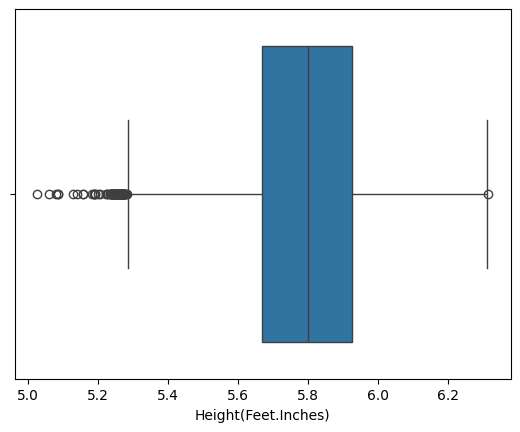

In [21]:
sns.boxplot(x=df['Height(Feet.Inches)'])

In [22]:
plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Axes: xlabel='Weight_kg'>

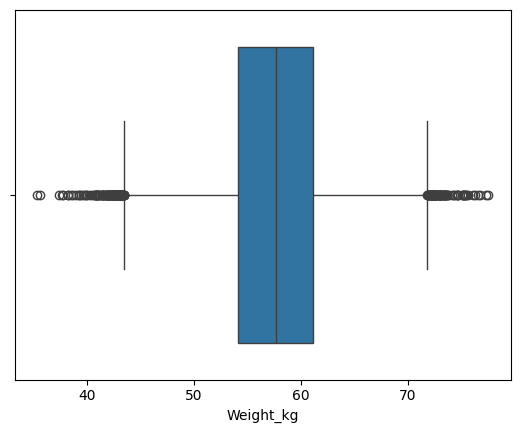

In [23]:
sns.boxplot(x=df['Weight_kg'])

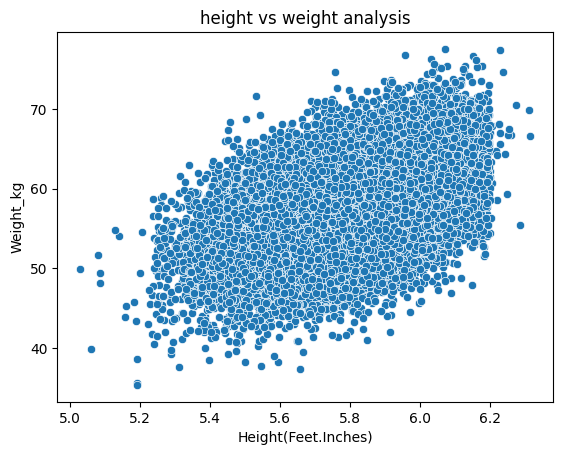

In [24]:
x =df['Height(Feet.Inches)']
y= df['Weight_kg']

sns.scatterplot(x=x,y=y)
plt.title('height vs weight analysis')
plt.xlabel('Height(Feet.Inches)')
plt.ylabel('Weight_kg')
plt.show()

In [25]:
df.sample(3)

,Weight_kg,Height(Feet.Inches)
2013,52.851270,5.529862
9594,42.525615,5.614828
9598,54.466057,5.894411


In [26]:
x= df.iloc[:,1]
x

0        5.578331
1        6.151521
2        5.939874
3        5.821660
4        5.778781
           ...   
24995    5.950215
24996    5.454826
24997    5.469855
24998    5.752918
24999    5.887761
Name: Height(Feet.Inches), Length: 25000, dtype: float64

In [27]:
df.iloc[:,0]

0        51.252494
1        61.909547
2        69.411778
3        64.562199
4        65.452010
           ...    
24995    53.538008
24996    54.518674
24997    53.644285
24998    59.995797
24999    56.641938
Name: Weight_kg, Length: 25000, dtype: float64

In [28]:
df.columns[1]

'Height(Feet.Inches)'

In [29]:
df.columns[0]

'Weight_kg'

In [30]:
scaler_x = StandardScaler()
x_scaled =scaler_x.fit_transform(x.values.reshape(-1,1))

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [32]:
print('shape of training data')
print(x_train.shape)
print(y_train.shape)

shape of training data
(20000,)
(20000,)


In [33]:
print('shape of testing data')
print(x_test.shape)
print(y_test.shape)

shape of testing data
(5000,)
(5000,)


In [34]:
x_train_2d = x_train.values.reshape(-1,1)
y_train_2d = y_train.values.reshape(-1,1)

x_test_2d = x_test.values.reshape(-1,1)
y_test_2d = y_test.values.reshape(-1,1)

print("shape of training data (x):",x_train_2d.shape)
print("shape of training data (y):",y_train_2d.shape)
print("shape of testing data (x):",x_test_2d.shape)
print("shape of testing data (y):",y_test_2d.shape)

shape of training data (x): (20000, 1)
shape of training data (y): (20000, 1)
shape of testing data (x): (5000, 1)
shape of testing data (y): (5000, 1)


In [35]:
lr = LinearRegression()
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
lr.fit(x_train_2d,y_train_2d)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
y_pred = lr.predict(x_test_2d)
y_pred[:10]

array([[55.94425481],
       [60.91226889],
       [56.56867714],
       [56.42643564],
       [51.52547113],
       [52.93798976],
       [60.30463034],
       [60.27256006],
       [62.74472434],
       [63.0616341 ]])

In [38]:
y_test_2d[:10]

array([[60.87349789],
       [64.25661383],
       [50.63170805],
       [53.62895327],
       [46.5397639 ],
       [48.20970821],
       [55.81821505],
       [55.03481631],
       [76.60307055],
       [55.98708736]])

In [39]:
mean_squared_error(y_pred,y_test_2d)

21.69730652290755

In [40]:
model_dtr = DecisionTreeRegressor()
model_dtr

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [41]:
model_dtr.fit(x_train_2d,y_train_2d)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [42]:
y_pred_dtr = model_dtr.predict(x_test_2d)
y_pred_dtr[:5]

array([63.37542065, 56.46639802, 56.7162365 , 64.71347169, 57.84078178])

In [43]:
mean_squared_error(y_pred_dtr,y_test_2d)

41.50751860513505

In [44]:
                    # NOW WE WILL USE RANDOM FOREST REGRESSOR MODEL

In [45]:
model_rfr = RandomForestRegressor()
model_rfr.fit(x_train_2d,y_train_2d)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
y_pred_rfr =model_rfr.predict(x_test_2d)
y_pred_rfr[:10]

array([58.45466458, 57.6563608 , 57.00009981, 61.37411514, 55.97058386,
       54.88680652, 61.19969722, 60.67284784, 60.69721072, 66.91051031])

In [47]:
mean_squared_error(y_pred_rfr,y_test_2d)

31.133450017256138

In [48]:
            # NOW WE WILL DO HYPER PARAMETER TUNING

In [48]:
from sklearn.model_selection import GridSearchCV
# define the hyperparameter you want to tune 
param_grid = {'fit_intercept':[True,False],'copy_X': [True,False]}

    # now create linear regression model
model_lr = LinearRegression()
grid_search = GridSearchCV(model_lr,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(x_train_2d,y_train_2d)

print('Best parameters:',grid_search.best_params_)
print('Best negative MSE score:',grid_search.best_score_)

Best parameters: {'copy_X': True, 'fit_intercept': True}
Best negative MSE score: -20.836260216566206


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model  
model_lr = LinearRegression()

# Perform 10-fold cross-validation
accuracy_scores = cross_val_score(model_lr, x_train_2d, y_train_2d, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
mse_scores = -accuracy_scores

# Print the MSE scores
print("MSE Scores:", mse_scores)

MSE Scores: [21.65411512 21.79844701 20.33072238 21.2128048  21.84713487 20.47547042
 20.38317103 20.4544885  21.45193422 18.76081422]


In [51]:
                       #NOW WE WILL WORK ON FINAL MODEL

In [50]:
final_model = LinearRegression(fit_intercept=True,copy_X=True)
final_model.fit(x_train_2d,y_train_2d)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
                  #CONVERTION TO PICKLE FILE

In [52]:
import pickle
filename = 'final_model.pkl'
with open(filename,'wb') as file:
    pickle.dump(final_model,file)

In [53]:
import os

In [54]:
os.path.abspath('final_model.pkl')

'c:\\Users\\ASUS\\P2 HEIGHT\\final_model.pkl'

In [57]:
filename= 'final_model.pkl'
with open(filename,'rb') as file:
    loaded_model = pickle.load(file)

height_input = 9.0
height_input_2d = np.array(height_input).reshape(1,-1)

predicted_weight = loaded_model.predict(height_input_2d)

print('predicted weight:',predicted_weight[0,0])

predicted weight: 103.35476329112262
